In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
hmnist_28_L=pd.read_csv(r"C:\Users\vinayaka\Downloads\HAM10000\hmnist_28_28_L.csv")
hmnist_28_L

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,172,171,173,175,164,187,207,210,208,206,...,210,217,221,209,185,187,192,192,192,0
10011,2,34,108,116,114,119,131,139,139,145,...,173,169,168,168,143,138,83,23,3,0
10012,122,154,162,170,179,197,200,195,202,199,...,221,215,205,187,209,198,187,164,156,0
10013,137,143,141,139,147,152,155,152,155,159,...,172,171,175,183,177,170,169,166,170,0


In [ ]:
hmnist_28_RGB=pd.read_csv(r'C:\Users\vinayaka\Downloads\HAM10000\hmnist_28_28_RGB.csv')
hmnist_28_RGB

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0


In [ ]:
meta_data=pd.read_csv(r'C:\Users\vinayaka\Downloads\HAM10000\HAM10000_metadata.csv')
meta_data

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
# Check for unique entries in each column
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [ ]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [ ]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

In [ ]:
meta_data.describe(include='all')

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0003789,ISIC_0027419,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [ ]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [ ]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']
# Distribution of value count for Location of disease
for column in categorical_columns:
    meta_data['localization'].value_counts()

meta_data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

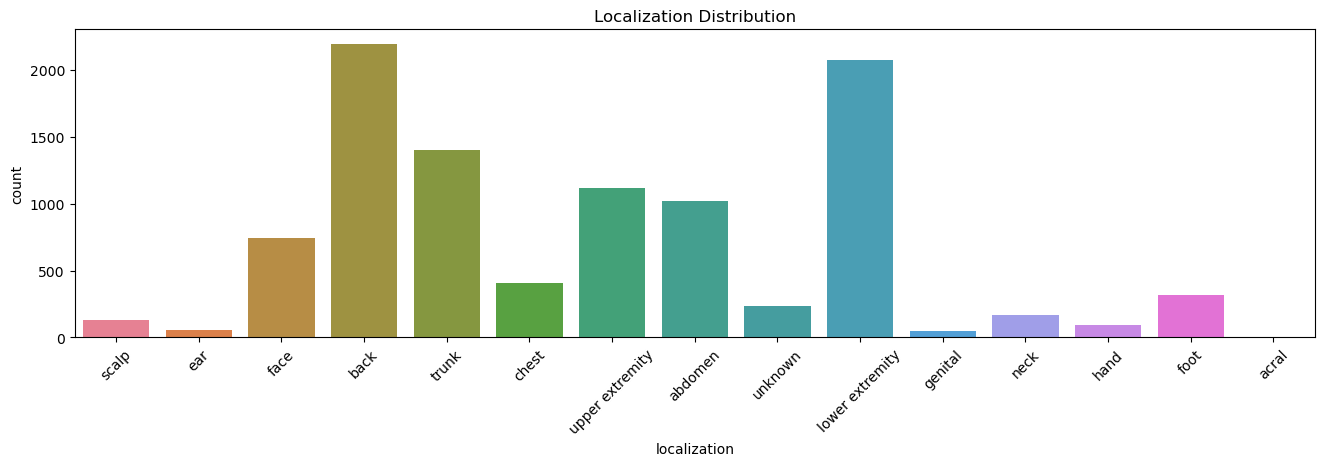

In [ ]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization', palette="husl")
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

# Create a new column with the updated diagnosis names
meta_data['Diagnosis'] = meta_data['dx'].map(diagnosis_mapping)

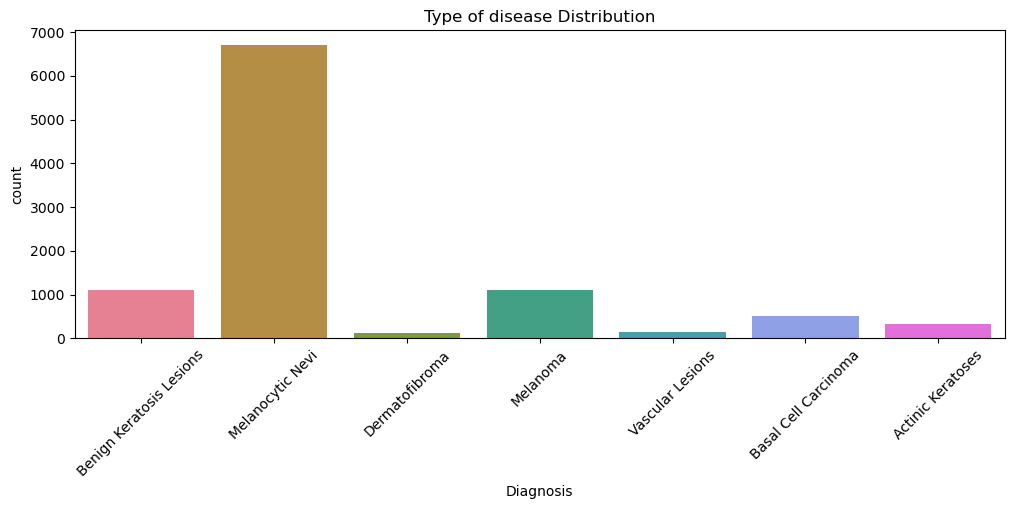

In [ ]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='Diagnosis',palette="husl")
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,Diagnosis
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign Keratosis Lesions
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign Keratosis Lesions
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign Keratosis Lesions
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign Keratosis Lesions
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign Keratosis Lesions


In [ ]:
#Handle Missing Entries using the median
# Replace missing values in 'age' column with median age
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

In [ ]:
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['dx'])

In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx_type       10015 non-null  object 
 3   age           10015 non-null  float64
 4   sex           10015 non-null  object 
 5   localization  10015 non-null  object 
 6   Diagnosis     10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
#Path to the images
image_path1='C:\\Users\\vinayaka\\OneDrive\\Desktop\\skin\\HAM10000_images_part_1'
image_path2='C:\\Users\\vinayaka\\OneDrive\\Desktop\\skin\\HAM10000_images_part_2'

In [ ]:
final_image_dataset = 'C:\\Users\\vinayaka\\Downloads\\HAM10000\\HAM10000_images'

In [ ]:
import os
import shutil
# Create the destination folder if it doesn't exist
if not os.path.exists(final_image_dataset):
    os.makedirs(final_image_dataset)

# Iterate through files in folder 1 and copy them to the destination folder
for filename in os.listdir(image_path1):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Specify file extensions as needed
        shutil.copy(os.path.join(image_path1, filename), final_image_dataset)

# Iterate through files in folder 2 and copy them to the destination folder
for filename in os.listdir(image_path2):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Specify file extensions as needed
        shutil.copy(os.path.join(image_path2, filename), final_image_dataset)

In [ ]:
meta_data['Image_path'] = meta_data['image_id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [ ]:
meta_data

,lesion_id,image_id,dx_type,age,sex,localization,Diagnosis,Image_path
0,HAM_0000118,ISIC_0027419,histo,80.0,male,scalp,Benign Keratosis Lesions,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
1,HAM_0000118,ISIC_0025030,histo,80.0,male,scalp,Benign Keratosis Lesions,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
2,HAM_0002730,ISIC_0026769,histo,80.0,male,scalp,Benign Keratosis Lesions,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
3,HAM_0002730,ISIC_0025661,histo,80.0,male,scalp,Benign Keratosis Lesions,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
4,HAM_0001466,ISIC_0031633,histo,75.0,male,ear,Benign Keratosis Lesions,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,histo,40.0,male,abdomen,Actinic Keratoses,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
10011,HAM_0002867,ISIC_0033550,histo,40.0,male,abdomen,Actinic Keratoses,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
10012,HAM_0002867,ISIC_0033536,histo,40.0,male,abdomen,Actinic Keratoses,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...
10013,HAM_0000239,ISIC_0032854,histo,80.0,male,face,Actinic Keratoses,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...


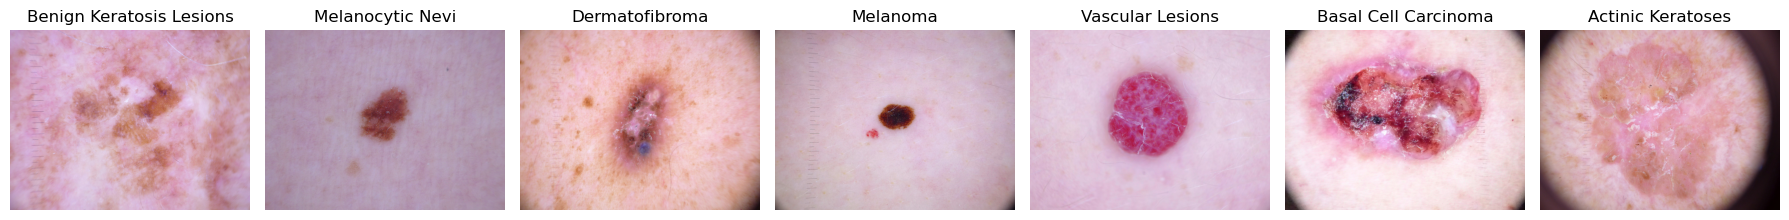

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# Function to display one image per class
def display_one_image_per_class(meta_data):
    classes = meta_data['Diagnosis'].unique()
    fig, axes = plt.subplots(1, len(classes), figsize=(18, 6))

    for i, class_name in enumerate(classes):
        class_images = meta_data[meta_data['Diagnosis'] == class_name]['Image_path']
        if not class_images.empty:
            image_path = class_images.iloc[0]  # Select the first image of each class
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Display one image per class from the DataFrame
display_one_image_per_class(meta_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform
meta_data['Label'] = label_encoder.fit_transform(meta_data['Diagnosis'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding:")
print(label_mapping)

Label Encoding:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [ ]:
pip install imgaug opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imgaug from https://files.pythonhosted.org/packages/66/b1/af3142c4a85cba6da9f4ebb5ff4e21e2616309552caca5e8acefe9840622/imgaug-0.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for Shapely from https://files.pythonhosted.org/packages/6a/5c/3330f499ca860f0b92db4ceaebd7090096a83c1ea3ae7d8d4c6111761b82/shapely-2.0.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/948.0 kB ? eta -:--:--
   ---------------------------------------- 10.2/948.0 kB ? eta -:--:--
   - ------------------------------------- 30.7/948.0 kB 435.7 kB/s eta 0:00:03
   -- ------------------------------------ 61.4/948.0 kB 656.4 kB/s eta 0:00:02
   ----- -------------------------------- 143.4/948.0 kB 950.9 kB/s eta 0:00:01
   ---------- ----------------------------- 245.8/948.0 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 450.6/

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io

In [ ]:
import os
import pandas as pd
from skimage import io
import imgaug.augmenters as iaa
from imgaug.augmentables.segmaps import SegmentationMapsOnImage

# Define your augmentation pipeline
aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flip with probability 0.5
    iaa.Flipud(0.2),  # vertical flip with probability 0.2
    iaa.Crop(percent=(0, 0.1)),  # random crop with a ratio of length and width of 0.9 to 1.0
    iaa.Affine(rotate=(-20, 20), shear=(-10, 10), mode='edge'),  # random rotation and shear, fill with edge pixels
    iaa.MultiplyBrightness((0.8, 1.2)),  # change brightness
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Gaussian blur
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # additive Gaussian noise
    iaa.ContrastNormalization((0.8, 1.2)),  # change contrast
    iaa.Multiply((0.8, 1.2)),  # change brightness
    iaa.Grayscale(alpha=(0.0, 1.0)),  # convert to grayscale with probability
    iaa.CoarseDropout(0.02, size_percent=0.05, per_channel=False),  # random dropout
    iaa.CLAHE(clip_limit=(1, 4))  # apply CLAHE
])

# Directory to save augmented images
augmented_images_dir = '/path/to/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

# Get the class counts
class_counts = meta_data['Diagnosis'].value_counts()
max_count = class_counts.max()

# Create an empty list to hold the balanced samples
balanced_samples = []

# Oversample each class with augmentation to match the class with the maximum count
for label in class_counts.index:
    class_subset = meta_data[meta_data['Diagnosis'] == label]

    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)

            # Save the augmented image
            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)

            # Store the augmented image and update the image path
            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)
            augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

# Combine all oversampled classes into a single DataFrame
balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)

print("Dataset balanced successfully!")



Dataset balanced successfully!


In [ ]:
# Rename the DataFrame to meta_data
meta_data = balanced_dataset
meta_data.head()

,lesion_id,image_id,dx_type,age,sex,localization,Diagnosis,Image_path,Label,Labell,Labelll
0,HAM_0001751,ISIC_0024698,consensus,70.0,male,face,Melanocytic Nevi,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...,4,5,1
1,HAM_0000559,ISIC_0024693,follow_up,45.0,female,upper extremity,Melanocytic Nevi,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...,4,14,2
2,HAM_0004932,ISIC_0032212,follow_up,45.0,female,foot,Melanocytic Nevi,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...,4,6,2
3,HAM_0004516,ISIC_0025775,follow_up,45.0,female,neck,Melanocytic Nevi,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...,4,10,2
4,HAM_0006510,ISIC_0029828,follow_up,55.0,female,lower extremity,Melanocytic Nevi,C:\Users\vinayaka\Downloads\HAM10000\HAM10000_...,4,9,2


In [ ]:
# Separate features (X) and target variable (y)
X = meta_data.drop(columns=['Label'])
y = meta_data['Label']

# Display the shape of X and y
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (46935, 10)
Shape of target variable (y): (46935,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (30038, 10)
Shape of y_train: (30038,)
Shape of X_test: (9387, 10)
Shape of y_test: (9387,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation and generators
train_datagen = ImageDataGenerator(
rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 30038 validated image filenames belonging to 7 classes.
Found 7510 validated image filenames belonging to 7 classes.
Found 9387 validated image filenames belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization() ,
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
     Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(units=7, activation='softmax', kernel_initializer='glorot_uniform')
])
# Compile the model
model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# Define callbacks
checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [ ]:
# Training the model
history=model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, reduce_lr, early_stopping]
)

Epoch 1/10


939/939 [==============================] - ETA: 0s - loss: 0.7451 - accuracy: 0.7753
Epoch 1: val_loss improved from inf to 0.33731, saving model to model_weights.keras
939/939 [==============================] - 3584s 4s/step - loss: 0.7451 - accuracy: 0.7753 - val_loss: 0.3373 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 2/10
939/939 [==============================] - ETA: 0s - loss: 0.3657 - accuracy: 0.8829
Epoch 2: val_loss improved from 0.33731 to 0.26872, saving model to model_weights.keras
939/939 [==============================] - 3297s 4s/step - loss: 0.3657 - accuracy: 0.8829 - val_loss: 0.2687 - val_accuracy: 0.9079 - lr: 0.0010
Epoch 3/10
939/939 [==============================] - ETA: 0s - loss: 0.2881 - accuracy: 0.9033
Epoch 3: val_loss improved from 0.26872 to 0.22307, saving model to model_weights.keras
939/939 [==============================] - 3303s 4s/step - loss: 0.2881 - accuracy: 0.9033 - val_loss: 0.2231 - val_accuracy: 0.9214 - lr: 0.0010
Epoch 4/10
9

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


# Predictions
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# Metrics
true_classes = test_generator.classes
accuracy = accuracy_score(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 1] + cm[0, 0])
report = classification_report(true_classes, predicted_classes, target_names=list(train_generator.class_indices.keys()), output_dict=True)
auc = roc_auc_score(tf.keras.utils.to_categorical(true_classes), predictions, multi_class='ovr')
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"AUC: {auc:.2f}")

294/294 [==============================] - 207s 702ms/step
Accuracy: 0.94
Sensitivity: 1.00
Specificity: 0.99
AUC: 1.00


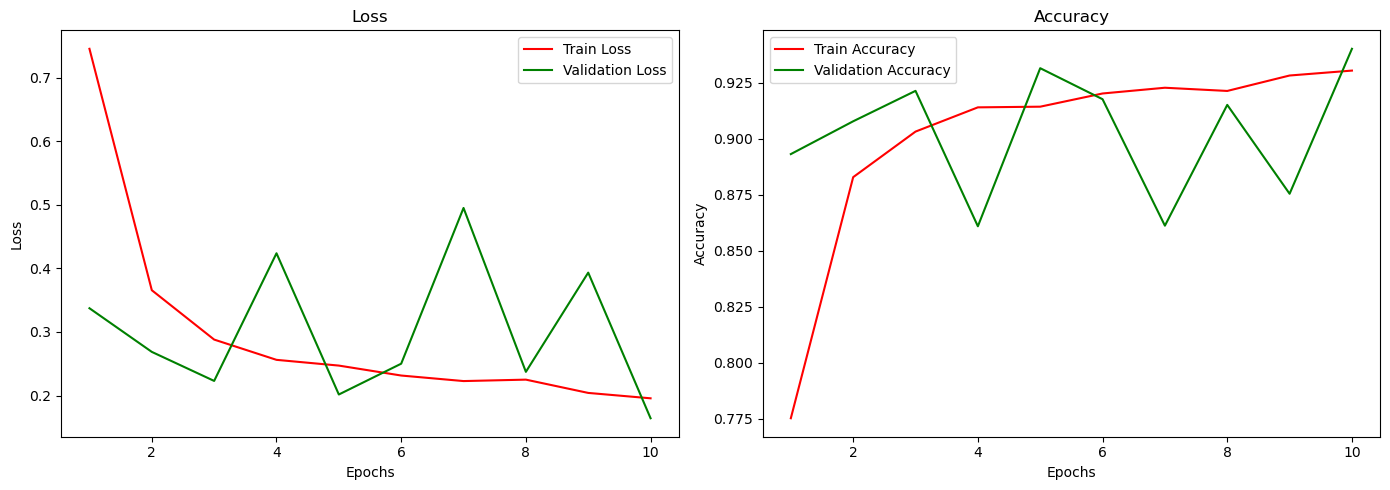

In [ ]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
